<a href="https://colab.research.google.com/github/Nolanole/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Copy_of_DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
import pandas as pd

#Add informative names to the features:
columns = ['age', 'year', 'nodes', 'survival']

#Load the data as a pandas data frame:
cancer = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', header=None, names=columns)

In [2]:
#Validate that it has the appropriate number of observations- UC website says 306 observations:
cancer.count()

age         306
year        306
nodes       306
survival    306
dtype: int64

In [3]:
#Validate that you have no missing values:
cancer.isna().sum()

age         0
year        0
nodes       0
survival    0
dtype: int64

In [4]:
#Change survical encoding to binary 0/1:
cancer.survival.replace(to_replace=2, value=0, inplace=True)
cancer.survival.value_counts()

1    225
0     81
Name: survival, dtype: int64

In [5]:
#At the end, print the first five rows of the dataset to demonstrate the above:
cancer.head()

,age,year,nodes,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [6]:
cancer.age.describe()

count    306.000000
mean      52.457516
std       10.803452
min       30.000000
25%       44.000000
50%       52.000000
75%       60.750000
max       83.000000
Name: age, dtype: float64

## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [62]:
from matplotlib import pyplot as plt

'''Use groupby function to split the data into 2 groups, those who survived > 5 
years and those who didnt, examine some charts to look for links'''

age_split = cancer.groupby('survival')['age']
nodes_split = cancer.groupby('survival')['nodes']

survival
0    [59, 66, 69, 60, 64, 67, 58, 63, 65, 62, 68, 61]
1    [64, 62, 65, 59, 58, 60, 61, 67, 63, 69, 66, 68]
Name: year, dtype: object
range(58, 70)


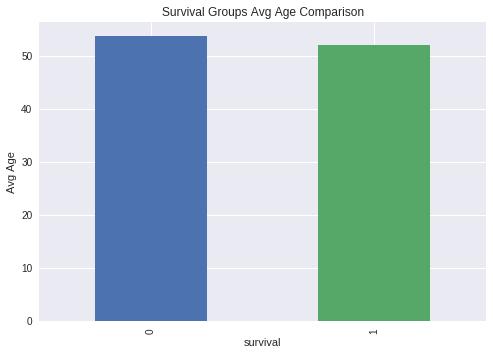

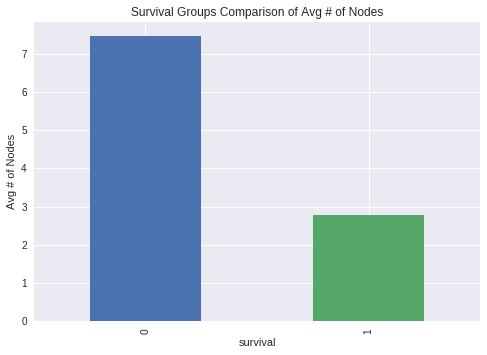

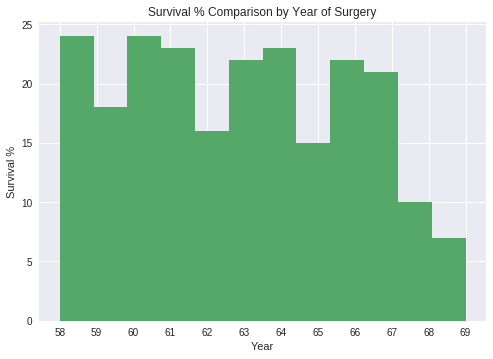

In [64]:
#Display this data visually in bar charts for survival comparison:

age_split.mean().plot(kind='bar')
plt.ylabel('Avg Age')
plt.title("Survival Groups Avg Age Comparison")
plt.show()

nodes_split.mean().plot(kind='bar')
plt.ylabel('Avg # of Nodes')
plt.title('Survival Groups Comparison of Avg # of Nodes')
plt.show()


In [9]:
#Quick glance at correlation chart
cancer.corr()

,age,year,nodes,survival
age,1.000000,0.089529,-0.063176,-0.067950
year,0.089529,1.000000,-0.003764,0.004768
nodes,-0.063176,-0.003764,1.000000,-0.286768
survival,-0.067950,0.004768,-0.286768,1.000000


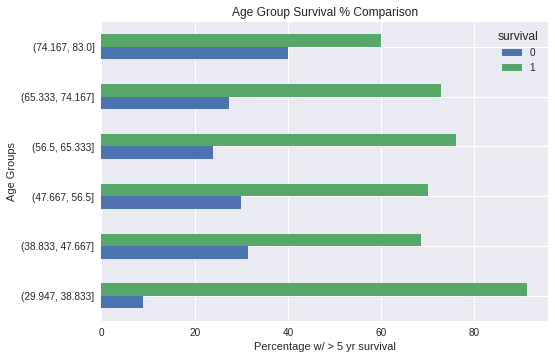

In [10]:
#Compare Survival relative to Age:

#Bin the data into age groups, and crosstab w/ survival:

age_bins = pd.cut(cancer.age, bins=6)
age_ct = pd.crosstab(age_bins, cancer.survival, normalize='index')

#Visualize it:
ax = age_ct.plot(kind='barh')
ax.set_ylabel('Age Groups')
ax.set_xlabel('Percentage w/ > 5 yr survival')
ax.set_xticklabels([0, 20, 40, 60, 80])
ax.set_title('Age Group Survival % Comparison')
plt.show()

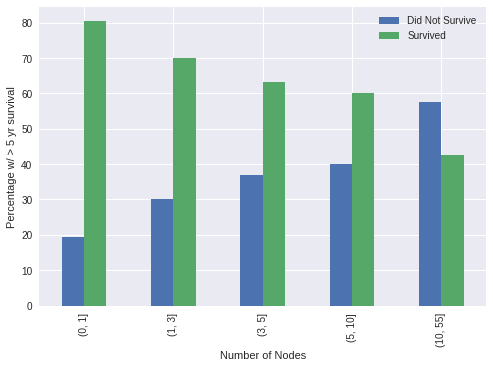

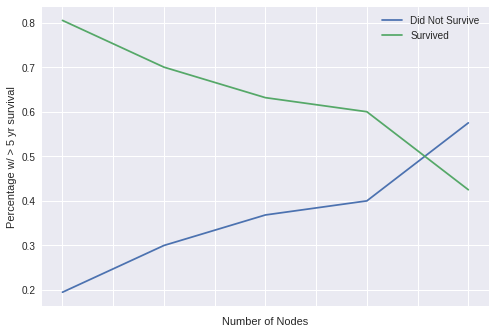

In [11]:
#Compare # Nodes vs Survival

#Bin the data for # of nodes
node_bins = pd.cut(cancer.nodes, bins=[0,1,3,5,10,55])
node_ct = pd.crosstab(node_bins, cancer.survival, normalize='index')

#Plots:

#Bar
ax = node_ct.plot(kind='bar')
ax.set_ylabel('Percentage w/ > 5 yr survival')
ax.set_yticklabels(range(0,90,10))
ax.set_xlabel("Number of Nodes")
plt.legend(['Did Not Survive', 'Survived'])
plt.show()

#Line
ax2 = node_ct.plot()
ax2.set_ylabel('Percentage w/ > 5 yr survival')
ax2.set_xlabel("Number of Nodes")
plt.legend(['Did Not Survive', 'Survived'])
plt.show()

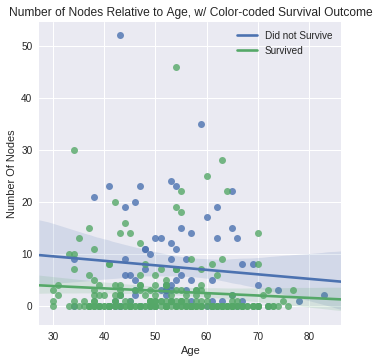

In [22]:
import seaborn as sns

#Age vs Number of Nodes

sns.lmplot(data=cancer, x='age', y='nodes', hue='survival', legend=False)
plt.xlabel('Age')
plt.ylabel('Number Of Nodes')
plt.title('Number of Nodes Relative to Age, w/ Color-coded Survival Outcome')
plt.legend(['Did not Survive', 'Survived'])
plt.show()


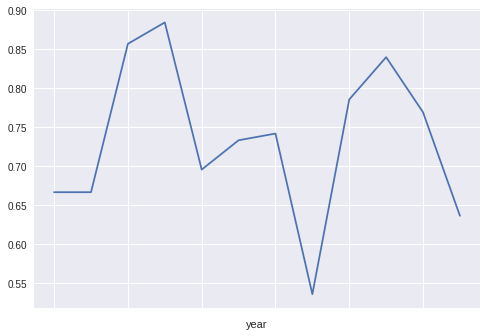

In [66]:
#year vs survival

year_bins = pd.cut(cancer.year, bins=12)
years = pd.crosstab(year_bins, cancer.survival, normalize='index')

#mean_survival by year bins:
survived_percentage = years[1]

survived_percentage.plot()
plt.show()

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.


The only feature that I can see that has a positive relationship w/ survival is the year of surgery. However, it is an extremely weak correlation (coeff of 0.005) and highly unlikely to have any statistical significance. If there were a technological breakthrough in the field of cancer surgery, I would expect the data to demonstrate a more clear uptick in survival percentages.

The features that have a negative relationship with survival are both age and the number of nodes. The crosstabs and charts above demonstrate, especially for the number of nodes, that 5 year survival decreases as the age of the patient increases, and as the number of nodes increases.

There does not appear to be any significant relationship between age and the number of nodes. Actually it appears that the number of nodes on avg is slightly lower for the older patients. This correlation coeff is also very weak (corr coeff of -0.063), which likely could just be randomness/noise, or it could mean that the patients who tend to have high number of nodes dont survive long enough to reach the advanced age.